In [1]:
import sys
sys.path.append('/home/featurize/Multi_Diffusion')

In [2]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from sympy.stats.sampling.sample_numpy import numpy
from src.gaussian_diffusion import GaussianDiffusion
from src.nb_diffusion import NBDiffusion
from src.unet import UNetModel
from src.utils import import_config

import matplotlib.pyplot as plt

In [3]:
datasets_type="mnist"
root_dir = "/home/featurize/Multi_Diffusion"
timesteps = 1000
beta_schedule = "linear"
checkpoint_path = "/home/featurize/Multi_Diffusion/checkpoints/checkpoint_123_Gaussian_False_3.pth"
diffusion_type = "Gaussian"
# 设置训练设备
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
# 加载原始数据集
    # 加载数据集

if datasets_type == "cifar10":
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])
    datasets.CIFAR10.url = "https://ai-studio-online.bj.bcebos.com/v1/8cf77ffb4c584eaaa716edb69eb0af6541eb532ddc0f4d00bfd7a06b113a2441?responseContentDisposition=attachment%3Bfilename%3Dcifar-10-python.tar.gz&authorization=bce-auth-v1%2F5cfe9a5e1454405eb2a975c43eace6ec%2F2025-01-23T15%3A41%3A37Z%2F21600%2F%2F8ba5a4006db020fa30e061cb18f8f7e93d5d5fce2492c17ac37c4d0f9fd7dcb2"
    dataset = datasets.CIFAR10(rf"{root_dir}/data", train=True, download=True, transform=transform)
    dataset_channel = 3
    dataset_image_size = 32
elif datasets_type == "mnist":
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.Pad(padding=2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ])
    dataset = datasets.MNIST(rf"{root_dir}/data", train=True, download=True, transform=transform)
    dataset_channel = 1
    dataset_image_size = 32

In [5]:
# 加载模型
unet_model = UNetModel(
    in_channels=1,
    model_channels=128,
    out_channels=1,
    channel_mult=(1, 2, 2, 2),
    attention_resolutions=(2,),
    dropout=0.1
).float()
check_point = torch.load(checkpoint_path)
unet_model.load_state_dict(check_point["model_state_dict"])
unet_model = unet_model.to(device)
# generate_image(diffusion,unet_model,img_num=3)
# images = torch.tensor(diffusion.sample(unet_model, 32, batch_size=64, channels=1))
# 画图
# paint_images_3(images, img_num=8)

In [6]:
diffusion = GaussianDiffusion(timesteps=timesteps, beta_schedule=beta_schedule)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True)

In [7]:
# 获取对应的shape

images, labels = next(iter(train_loader))
imgs=diffusion.sampleA(unet_model,32,images,128,1)
# diffusion.sample(unet_model, dataset_image_size, batch_size=64, channels=dataset_channel)

sampling loop time step: 100%|██████████| 1000/1000 [03:36<00:00,  4.62it/s]


In [8]:
def paint_images_4(imgs,img_num=8,time_steps=1000):
    # 画图
    fig = plt.figure(figsize=(img_num*2, img_num+2), constrained_layout=True)
    gs = fig.add_gridspec(img_num*2, img_num+2)
    t_idx = [x*(time_steps//img_num) for x in range(img_num)]
    t_idx[-1] = time_steps - 21
    t_idx.append(time_steps-11)
    t_idx.append(time_steps-1)
    for n_row in range(img_num):
        for n_col in range(img_num+2):
            f_ax = fig.add_subplot(gs[n_row, n_col])
            img = torch.tensor(imgs[t_idx[n_col],n_row]).permute([1,2,0])
            # img = numpy.array((img - img.min()) / (img.max() - img.min()), dtype=numpy.uint8)
            img = numpy.array((img + 1.0) * 255 / 2, dtype=numpy.uint8)
            f_ax.imshow(img)
            f_ax.axis("off")
    for n_row in range(img_num,img_num*2):
        for n_col in range(img_num+2):
            f_ax = fig.add_subplot(gs[n_row, n_col])
            img = torch.tensor(imgs[t_idx[n_col],n_row-img_num]).permute([1,2,0])
            img = numpy.array(((img - img.min()) / (img.max() - img.min()))*255, dtype=numpy.uint8)
            # img = numpy.array((img + 1.0) * 255 / 2, dtype=numpy.uint8)
            f_ax.imshow(img)
            f_ax.axis("off")
    plt.show()

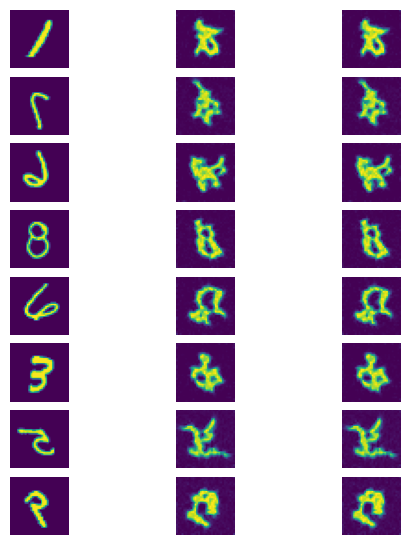

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8*2, 8+2), constrained_layout=True)
gs = fig.add_gridspec(8*2, 8+2)
for row in range(8):
    f_one = fig.add_subplot(gs[row, 1])
    img1 = images[row].permute([1,2,0])
    f_one.imshow(img1)
    f_one.axis("off")
    f_two = fig.add_subplot(gs[row, 2])
    img2 = torch.tensor(imgs[999][row]).permute([1,2,0])
    # img = numpy.array((img - img.min()) / (img.max() - img.min()), dtype=numpy.uint8)
    img2 = numpy.array((img2 + 1.0) * 255 / 2, dtype=numpy.uint8)
    f_two.imshow(img2)
    f_two.axis("off")
    f_three = fig.add_subplot(gs[row, 3])
    img3 = torch.tensor(imgs[999][row]).permute([1,2,0])
    img3 = numpy.array(((img3 - img3.min()) / (img3.max() - img3.min()))*255, dtype=numpy.uint8)
    # img = numpy.array((img + 1.0) * 255 / 2, dtype=numpy.uint8)
    f_three.imshow(img3)
    f_three.axis("off")
plt.show()
    




    